In [1]:
import matplotlib.pyplot as plt
original_grid = plt.grid

# Define a wrapper function that applies custom grid and tick settings
def grid_proxy(*args, **kwargs):
    # Apply custom grid settings
    kwargs.setdefault('which', 'both')
    kwargs.setdefault('linestyle', '--')
    kwargs.setdefault('linewidth', 0.5)
    
    # Call the original plt.grid function with the updated settings
    original_grid(*args, **kwargs)
    
    # Automatically turn on minor ticks
    plt.minorticks_on()
    
    # Apply custom minor tick parameters
    plt.tick_params(which='minor', length=4, color='r')

# Override plt.grid with the proxy function
plt.grid = grid_proxy

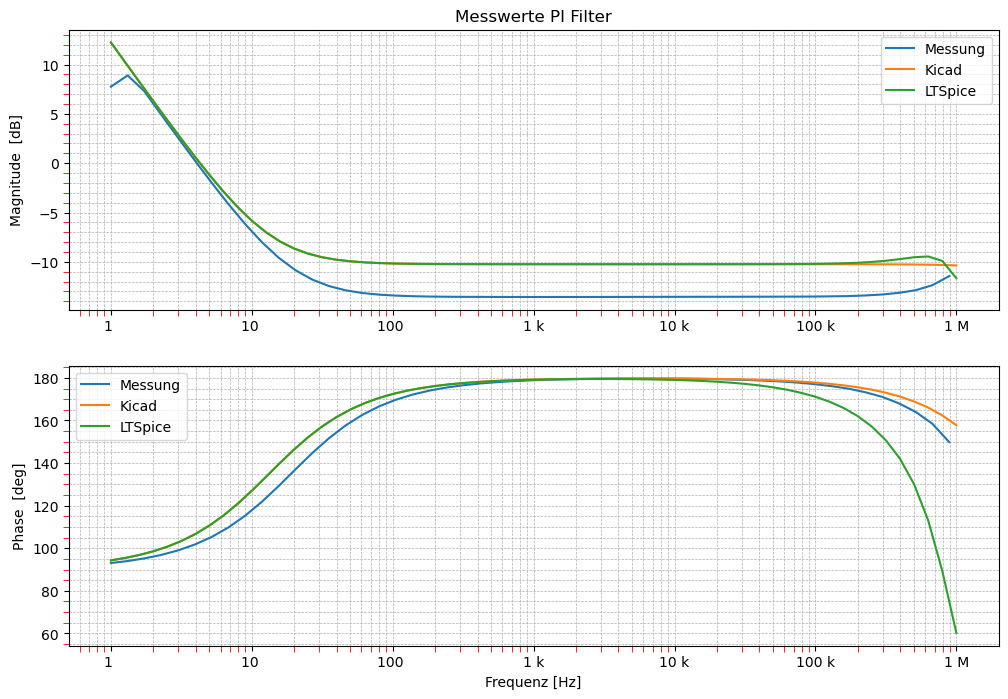

In [18]:
import pandas as pd

from matplotlib.ticker import FuncFormatter
import numpy as np

# Loading the data from the CSV file
df = pd.read_csv("PI_Filter_versuch5_besser.csv", delimiter=',', comment='#',encoding = 'ISO-8859-1')
df2= pd.read_csv("pi_filter_sim_kicad.csv", delimiter=';')
df3 = pd.read_csv("PI_Filter_LTSpice.txt", sep='\t', encoding='cp1252')
df3[['Magnitude_dB', 'Phase_deg']] = df3['V(n005)'].str.extract(r'\((.*?)dB,(.*?)°\)')



# Convert the new columns to numeric data types

df3['Magnitude_dB'] = pd.to_numeric(df3['Magnitude_dB'])

df3['Phase_deg'] = pd.to_numeric(df3['Phase_deg'])


# Helper functions for formatting labels
def format_with_unit(value, unit):
    """Format a number and append a unit, removing trailing zeros."""
    formatted_value = '{:1.2f}'.format(value).rstrip('0').rstrip('.')
    return formatted_value + ' ' + unit if formatted_value != '' else '0 ' + unit

def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return format_with_unit(x * 1e-9, 'G')
    elif x >= 1e6:
        return format_with_unit(x * 1e-6, 'M')
    elif x >= 1e3:
        return format_with_unit(x * 1e-3, 'k')
    else:
        return format_with_unit(x, '')

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

def format_time(x, pos):
    """Format time axis with SI unit prefixes."""
    if x >= 1:
        return format_with_unit(x, 's')
    elif x >= 1e-3:
        return format_with_unit(x * 1e3, 'ms')
    elif x >= 1e-6:
        return format_with_unit(x * 1e6, 'µs')
    else:
        return format_with_unit(x * 1e9, 'ns')



plt.figure(figsize=(12, 8))
plt.subplot(2, 1,1 )
#	#Digilent WaveForms Network Analyzer - Bode
#20	Frequency (Hz),Channel 1 Magnitude (dB),Channel 2 Magnitude (dB),Channel 2 Phase (deg)
plt.semilogx(df['Frequency (Hz)'], df['Channel 2 Magnitude (dB)'],label="Messung")
plt.semilogx(df2['frequency'], df2['V(/pifilter/aus)9'], label='Kicad')
plt.semilogx(df3['Freq.'], df3['Magnitude_dB'], label='LTSpice')
plt.title('Messwerte PI Filter')
plt.ylabel('Magnitude  [dB]')
plt.legend()
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_freq))
plt.grid(True)
plt.subplot(2, 1,2 )
plt.semilogx(df['Frequency (Hz)'], df['Channel 2 Phase (deg)'],label="Messung")
plt.semilogx(df2['frequency'], df2['V(/pifilter/aus)5'], label='Kicad')
plt.semilogx(df3['Freq.'], df3['Phase_deg'], label='LTSpice')
plt.ylabel('Phase  [deg]')
plt.xlabel('Frequenz [Hz]')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_freq))
plt.grid()
plt.legend()
plt.savefig("pi-filter-messung.pdf")
plt.show()

In [12]:
df2= pd.read_csv("pifilter_simulation.csv", delimiter=';')

In [10]:
df3

,Freq.,V(n005),Magnitude_dB,Phase_deg
0,1.000000,"(1.22396729324707e+001dB,9.43120670592972e+001°)",12.239673,94.312067
1,1.258925,"(1.02540081490387e+001dB,9.54224500613390e+001°)",10.254008,95.422450
2,1.584893,"(8.27663145336343e+000dB,9.68144833480219e+001°)",8.276631,96.814483
3,1.995262,"(6.31224730663023e+000dB,9.85553581153572e+001°)",6.312247,98.555358
4,2.511886,"(4.36810307058956e+000dB,1.00724232667328e+002°)",4.368103,100.724233
...,...,...,...,...
56,398107.170553,"(-9.71829475046134e+000dB,1.42023432832526e+002°)",-9.718295,142.023433
57,501187.233627,"(-9.52972273308263e+000dB,1.30043289340328e+002°)",-9.529723,130.043289
58,630957.344480,"(-9.45060991224553e+000dB,1.13056619040175e+002°)",-9.450610,113.056619
59,794328.234724,"(-9.90703894641806e+000dB,8.93400533967449e+001°)",-9.907039,89.340053
